## DBSCAN
DBSCAN which stands for `Density Based Spatial Clustering of Application with Noise` is a unsupervised machine learning algorithm. It is used for clustering problems. It works on the assumption that clusters are dense regions in space separated by regions of lower density. It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that **it is robust to outliers**. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

#### DBSCAN vs other clustering algorithm
> <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db7-1.png" width="600" height="400">
> <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db6-e1584577503359.png" width="300" height="200">

### How DBSCAN works?
DBSCAN mainly has two parameter `Epsilon` and `Minpoints`, epsilon is referred as the value of radius of a circle and minpoints is termed for minimum number of points. So what are these values and why we need it? Actually the way DBCAN create clusters is by visiting every single points and draw a circle of the radius value of `epsilon` and in that circle if it found atleast `minpoints` (value of minpoints), it assign it as the `Core Point`. And if a particular formed circle doesn't have the total n minpoints then DBSCAN tries to identify that if that particular points falls in any circle of core points or i.e, if it a neighbour of any core point. If it is identified as the neighbour of any core point then it is assigned as `Border Points` or else it is assigned as `Noise Points` which is nothing but the outliers. Also if a point `q` is a neighbour of point `p` and point `p` is a core point then point `q` is termed as `Direct density reachable` to point `p`.
> <img src="https://machinelearninggeek.com/wp-content/uploads/2020/10/image-58.png" width="600" height="400">

### How Clusters are formed?
So how a cluster is formed? Initally all points are unvisited by DBSCAN so it visits them one by one and tries to find if it a core point or not, if it is, then it marked it as visited and forms a cluster. If the point is identified as noise points then it is marked as unvisited. And similary it visits other points and if other points say `A` is core point and are neighbour of core point `B` then both are put in same cluster `P` also the boundary points of both core points are dumped in same cluster. One by one it visits all points and put in different cluster and filter out the And this way it creates different cluster.
**In below gif we can see DBSCAN in action**
> <img src="https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif" width="600" height="400">

#### How to choose parameter value?
**Epsilon**: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

**minPoints**: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.

#### Advantages of DBSCAN:
*  Is great at separating clusters of high density versus clusters of low density within
a given dataset.
* Does not require to specify number of clusters beforehand.
* Performs well with arbitrary shapes clusters.
* DBSCAN is robust to outliers and able to detect the outliers.

#### Disadvantages of DBSCAN:
*  Does not work well when dealing with clusters of varying densities. While
DBSCAN is great at separating high density clusters from low density clusters,
DBSCAN struggles with clusters of similar density.
* Struggles with high dimensionality data. I know, this entire article I have stated
how DBSCAN is great at contorting the data into different dimensions and shapes.
However, DBSCAN can only go so far, if given data with too many dimensions,
DBSCAN suffers


## Building DBSCAN

In [1]:
# importing requirement
import pandas as pd # <-- for handling dataset
from sklearn.cluster import DBSCAN # <-- for creating DBSCAN model
from sklearn.metrics import silhouette_score # <-- for measuring model performance
import seaborn as sns # <-- for visualization
import matplotlib.pyplot as plt # <-- for visualization

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.sample(10, random_state=41)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
63,64,Female,54,47,59
168,169,Female,36,87,27
196,197,Female,45,126,28
68,69,Male,19,48,59
9,10,Female,30,19,72
152,153,Female,44,78,20
91,92,Male,18,59,41
51,52,Male,33,42,60
172,173,Male,36,87,10


In [3]:
# separating features and label
features = df.iloc[:, [3, 4]]

In [4]:
# building our model
model = DBSCAN(eps=5, min_samples=5)
model.fit(features)

DBSCAN(eps=5)

In [5]:
# let's test our model on test data
cluster = model.labels_

In [6]:
print(cluster)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  2 -1  4  3  2  3  2 -1  2  3  4  3  2  3  2  3  4 -1  4
  3  4 -1  2 -1  4 -1  4 -1  2 -1  4  3  2  3  2 -1  4 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [7]:
model.core_sample_indices_

array([  3,   5,  47,  48,  49,  50,  52,  53,  54,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 129, 130, 131, 133, 136,
       137, 138, 139, 140, 141, 143, 147, 149, 151, 155, 159], dtype=int64)

In [8]:
#Identifying which points make up our “core points”
import numpy as np
core_samples = np.zeros_like(cluster, dtype=bool)
core_samples[model.core_sample_indices_] = True
print(sum(core_samples))

89


our datasets have total of 89 core points

In [12]:
df['class'] = cluster
df['class'].unique()

array([-1,  0,  1,  2,  4,  3], dtype=int64)

-1 represents outliers and rest are clusters so we have total of 5 clusters

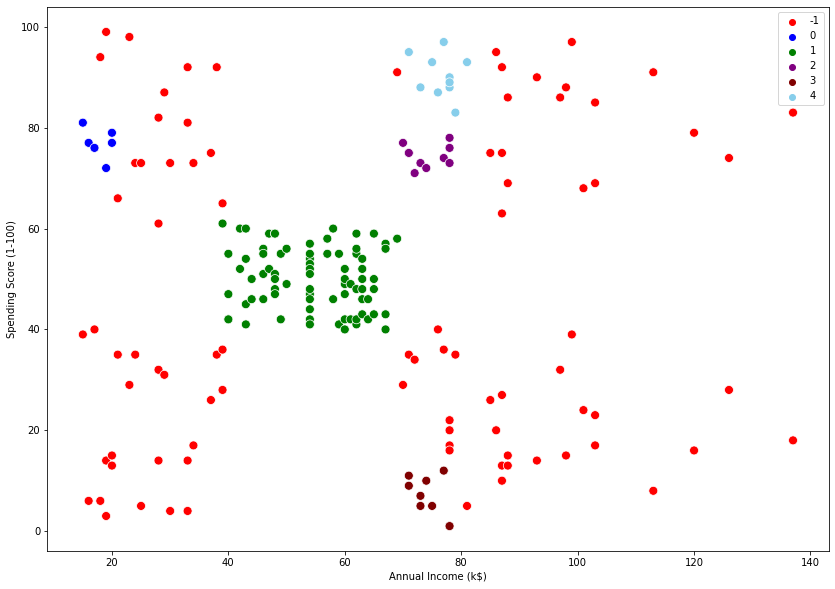

In [13]:
c = ['red', 'blue', 'green', 'purple', 'maroon', 'skyblue']
plt.figure(figsize=(14, 10))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['class'], s=80, palette=c)
plt.legend()
plt.show()

It clustered most of the data points as noise, the only class which is clustered well is class `1` and rest are awful. I guess `KMeans` which we done earlier is best for it. This doesn't mean DBSCAN is not good, it is great but it doesn't works well with every dataset. 

In [14]:
# let's check the model score with silhouette_score
silhouette_score(features, cluster)

0.1135163893571667

The value of silhouette_score ranges from -1 to 1 and we got `0.1135163893571667`, which is definitely not a good score.